# Final Project in COMP 767

This project is an implementation of the paper **Active Object Localization with Deep Reinforcement Learning** (http://slazebni.cs.illinois.edu/publications/iccv15_active.pdf).
This paper goal is do detection on the VOC 2007 dataset. To acheive it it propose an reinforcement leanring algorithm that consider each image of the dataset as an different environement for an agent that as the goal to find the thighest bounding box around object of a specific class. 
The agent uses deep reinforcement leaning to accomplish its goal.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import torchvision.models as models

import gym_project.envs.object_localization as object_localization
from agent import Agent

## Training

In [88]:
BATCH_SIZE = 64
DISCOUNT_RATE = 0.9
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 2000
TARGET_UPDATE = 10
NB_EPISODE = 100
MEMORY_SIZE = 5000

env = object_localization.ProjectEnv(detected_class = 11)
agent = Agent(env, 
              target_update=TARGET_UPDATE, 
              discout_rate=DISCOUNT_RATE,
              eps_start=EPS_START, 
              eps_end=EPS_END, 
              eps_decay=EPS_DECAY,
              batch_size=BATCH_SIZE, 
              memory_size=MEMORY_SIZE, 
              n_past_action_to_remember=10)
lenghts = agent.train(env, NB_EPISODE)
print(lenghts)

Environement initializatione done for class : dog
Agent initialization done
0.29297011077823454
Episode : 0, len : 17
0.283447265625
Episode : 1, len : 2
0.06659267480577137
Episode : 2, len : 12
0.6244399814614553
Episode : 3, len : 2
0.27437794216543376
0.06204298692665633
Episode : 4, len : 33
0.32333141470006754
Episode : 5, len : 20
0.11287814989959188
0.008995579315307907
Episode : 6, len : 10
0.06439493228484054
Episode : 7, len : 70
0.6163821976903084
Episode : 8, len : 4
0.3810867462108997
Episode : 9, len : 5
0.2977900552486188
0.41085840058694056
Episode : 10, len : 23
0.3385416666666667
0.08424994149309618
0.057625145518044235
Episode : 11, len : 34
0.17310746426680784
0.029496173469387755
Episode : 12, len : 3
0.08974392715214359
0.005512679162072767
Episode : 13, len : 10
0.4519881996094237
Episode : 14, len : 23
0.4607872446437469
Episode : 15, len : 5
0.05890302437205834
Episode : 16, len : 10
0.24494419736510867
Episode : 17, len : 21
0.5080751050420168
Episode : 18, l

## Testing

0.6464445153061225
reset


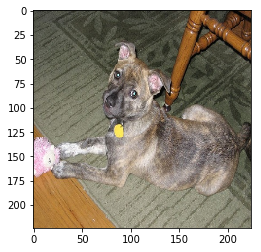

bigger


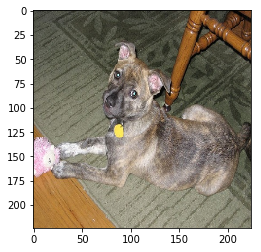

bigger


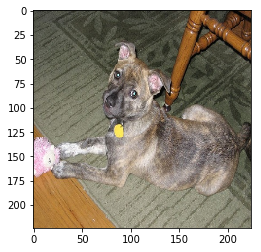

trigger


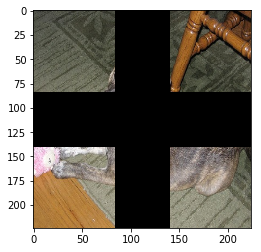

3


In [99]:
imgs, actions, t = agent.test_episode(env)
for img,action in zip(imgs, actions):
    print(action)
    plt.imshow(img)
    plt.show()
print(t)